<a href="https://colab.research.google.com/github/vivivicdjdk/machine/blob/main/6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-평균

k-평균 알고리즘

타깃값을 모르는(사진에 어떤 과일이 들어 있는 지 알지 못하는)비지도 학습에서 평균값을 자동으로 구하는 알고리즘

평균값이 클러스터의 중심에 위치하기 때문에 클러스터 중심(cluster center)또는 센트로이드(centroid)라고 부름

동작방식

0. 무작위로 k개의 클러스터 중심을 정함

1. 클러스터 중심에서 가까운 샘플들을 찾아 해당 클러스터 샘플로 지정

2. 클러스터에 속한 샘플의 평균값으로 클러스터 중심을 변경(클러스터 중심이 클러스터에 가장 많이 포함된 종류의 평균에 가깝게 조금씩 변경됨)

3. 클러스터 중심에 변화가 없을 때까지 1번부터 반복

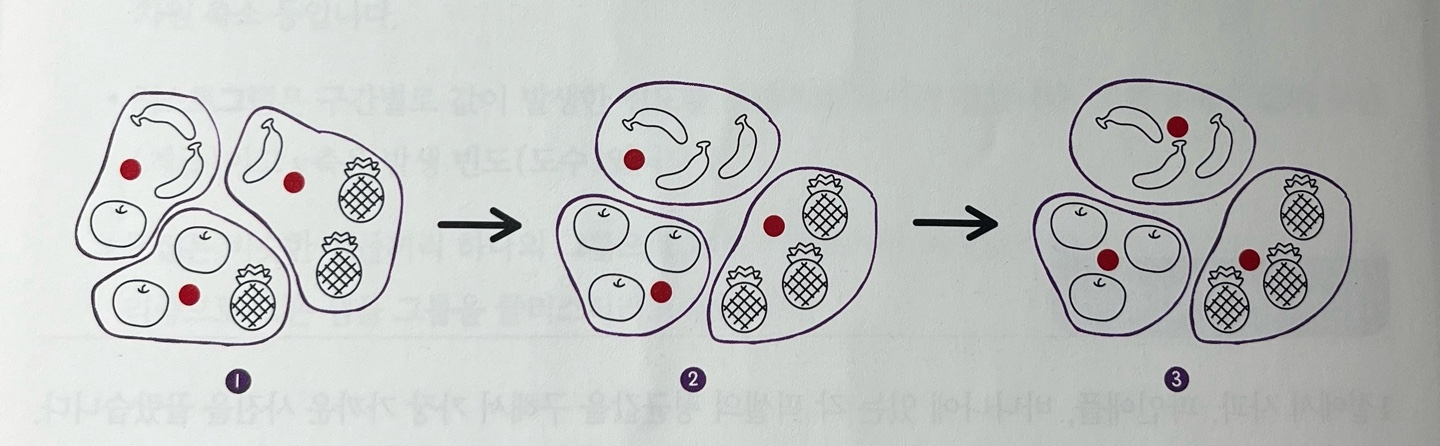

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2023-11-01 13:44:29--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-11-01 13:44:29--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 20.29.134.23
Connecting to github.com (github.com)|20.29.134.23|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-11-01 13:44:30--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [ ]:
import numpy as np

fruits = np.load('fruits_300.npy')
# (샘플 개수, 너비 , 높이)의 3차원 배열을 (샘플개수, 너비*높이)의 2차원 배열로 변경
fruits_2d = fruits.reshape(-1, 100*100)

k-평균 알고리즘은 sklearn.cluster 모듈 아래 KMeans클래스에 구현

In [ ]:
from sklearn.cluster import KMeans
# n_clusters: 클러스터의 개수 지정(초깃값 9)
km= KMeans(n_clusters=3, random_state=42)
# 경고 보기 싫으면                      , n_init='auto')
# 비지도 학습이므로 정답X. 따라서 fit의 입력은 하나
km.fit(fruits_2d)
# 군집 결과 출력
print(km.labels_) # labels_배열의 길이 == 샘플 개수

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


지정된 클러스터의 개수가 3이므로 레이블 값을 0,1,2로 구성

각 레이블 값이 무엇을 뜻하는 지는 현재 알 수 없음

이를 알기 위해 직접 이미지를 출력하는 것이 최선

먼저 각 레이블의 샘플 수 출력

In [ ]:
print(np.unique(km.labels_, return_counts=True)) # return_counts=True: 각 레이블의 원소 개수 출력

(array([0, 1, 2], dtype=int32), array([111,  98,  91]))


첫 번째 클러스터(레이블0)가 111개의 샘플을 모았고, 두 번째 클러스터(레이블1)가 98개의 샘플을, 세 번째 클러스터(레이블2)는 91개의 샘플을 모았음

그림 출력 함수 생성

draw_fruits()

3차원(샘플 개수, 너비, 높이) 배열을 입력받아 가로로 10개씩 이미지를 출력

In [ ]:
import matplotlib.pyplot as plt

# 사용자 정의 함수 생성
def draw_fruits(arr, ratio=1): # arr는 필수
  # ratio: figsize 지정(ratio 에 비례하여 크기 조절). 기본값은 1
  n = len(arr) # n은 샘플 개수
  # ceil: 올림
  rows = int(np.ceil(n/10)) ## n이 11이면 rows=2, cols=10,, n=5이면 rows=1, cols=5
  # 행이 1이라면 열의 개수는 샘플의 개수. 그렇지 않으면  10개
  cols = n if rows < 2 else 10
  # if rows<2:
  #   cols=n
  # else:
  #   cols=10

  # plt.subplots() 함수는 2개의 원소를 가지는 array 형태로 axs 객체가 반환됨
  # 2개의 원소를 (1,2)와 같은 2차원 형태로 반환할지, (2, )와 같은 1차원 형태로 반환할지를 squeeze가 결정
    # squeeze=True라면(기본값) 2차원(1,2)을 압축해서 (2, )로 출력
  fig, axs = plt.subplots(rows, cols,
                          figsize=(cols*ratio, rows*ratio), squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n: # n개 까지만 그림
        axs[i,j].imshow(arr[i*10 + j], cmap='gray_r') # 좌표축 표시 제거
      axs[i,j].axis('off')
  plt.show()

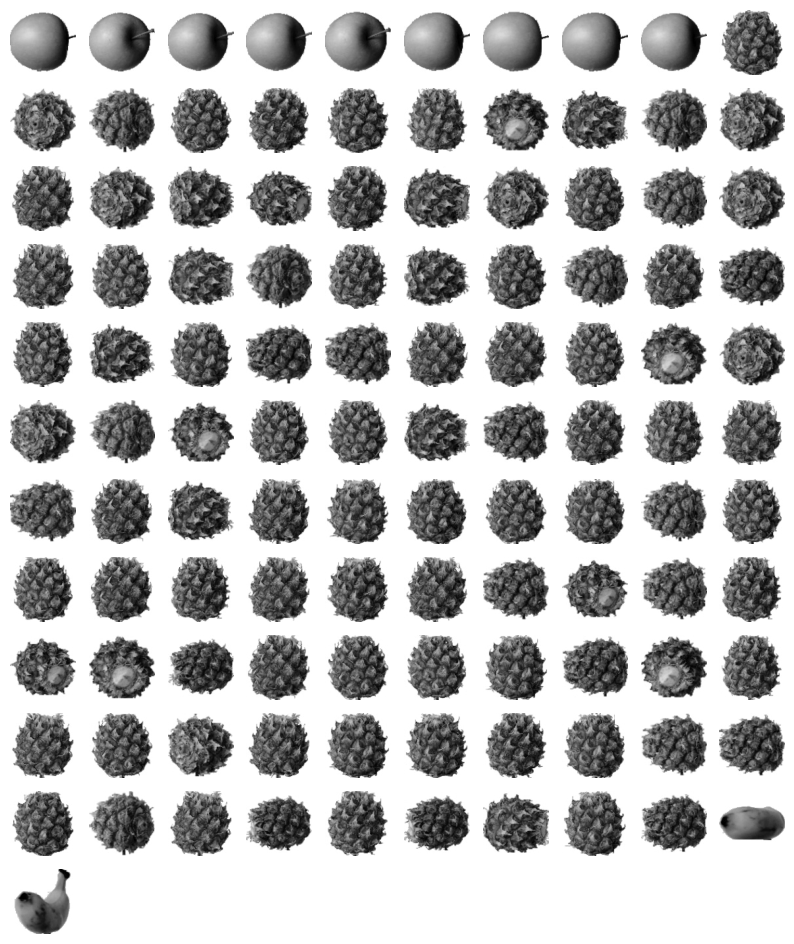

In [ ]:
draw_fruits(fruits[km.labels_==0]) # 불리언 인덱싱 사용(labels_배열에서 값이 0인 위치는 True, 그 외는 모두 False)

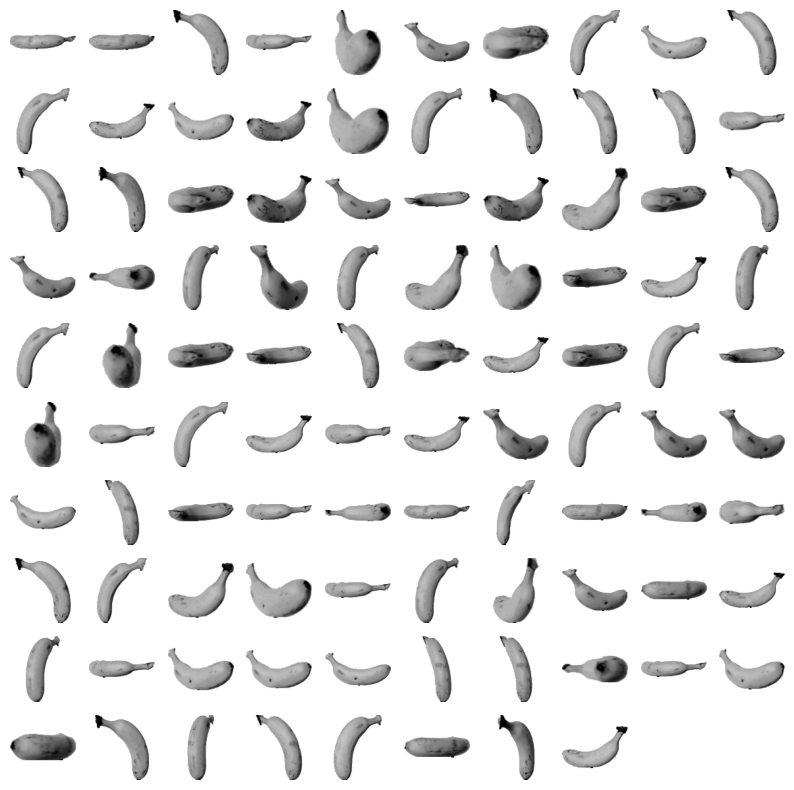

In [ ]:
draw_fruits(fruits[km.labels_==1])

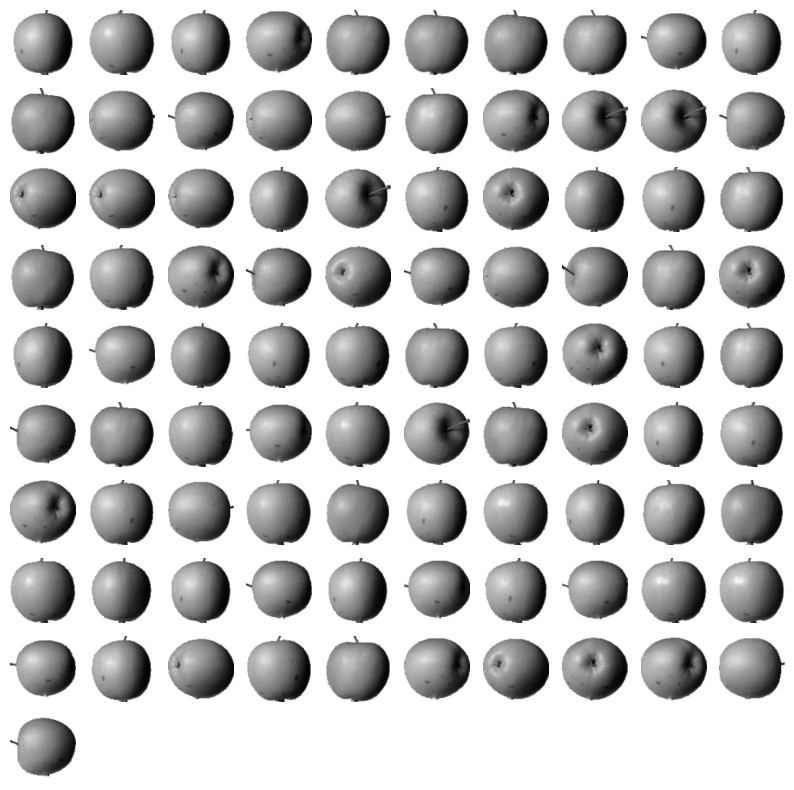

In [ ]:
draw_fruits(fruits[km.labels_==2])

##**클러스터 중심**

kMeans 클래스가 최종적으로 찾은 클러스터 중심은 cluster_centers_속성에 저장

이 배열은 fruits_2d 샘플의 값이기 때문에 각 중심을 이미지로 출력하려면 100*100 크기의 2차원 배열로 바꿔야 함

In [ ]:
print(km.cluster_centers_.shape)

(3, 10000)


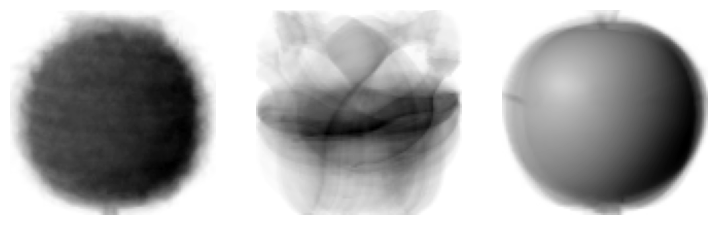

In [ ]:
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3) # ratio=3 3배 확대

**KMeans 클래스의 유용한 메서드**

transform() 메서드

샘플에서 클러스터 중심까지의 거리로 변환

transform() 메서드가 있다는 것은 StandardScaler 클래스처럼 특성값을 변환하는 도구로 사용할 수 있다는 의미

---

인덱스가 100인 샘플에 transform()메서드를 적용하여 각 클러스터별 거리를 알아보자

fit()메서드와 동일하게 2차원 배열을 입력해야함

fruits_2d[100]처럼 쓰면 (10000,) 크기의 배열이 되므로 에러가 발생

슬라이싱 연산자를 사용해서(1,10000) 크기의 배열로 변환

In [ ]:
print(km.transform(fruits_2d[100:101]))

fruits_2d_0=fruits_2d[100]
fruits_2d_2=fruits_2d_0.reshape(1,-1)
print(km.transform(fruits_2d_2))
# 레이블 3개니까 값 3개 출력

[[3393.8136117  8837.37750892 5267.70439881]]
[[3393.8136117  8837.37750892 5267.70439881]]


이 샘플은 클러스터 까지의 거리가 가장 작은 레이블 0에 속한다고 볼 수 있음

In [ ]:
print(km.predict(fruits_2d[100:101])) # 2차원 배열이기 때문에 fruits_2d

[0]


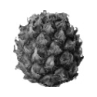

In [ ]:
draw_fruits(fruits[100:101]) # 3차원 배열이기 때문에 fruits

n_iter_: 최적의 클러스터를 찾기 위해 알고리즘이 반복한 횟수가 보관됨

In [ ]:
print(km.n_iter_)

4


**이 방법의 문제점**

타깃값을 사용하지 않았지만, 비지도 학습이라 하기에는 n_clusters를 사용하여 타깃에 대한 정보를 활용했음

k-평균 알고리즘의 단점: 클러스터 개수를 사전에 지정해야함

실전에서는 클러스터 개수도 알 수 없음

##**최적의 k 찾기**

군집 알고리즘에서 최적의 k찾는 완벽한 방법은 없음

**엘보우(elbow) 방법**

대표적인 k값 찾는 방법

k-평균 알고리즘이 클러스터 중심과 클러스터에 속한 샘플 사이의 거리를 계산 가능하다는 특성을 이용

이너셔를 계산하여 비교함으로써 최적의 k를 찾음

* 이너셔(ineria): 클러스터 중심과 클러스터에 속한 샘플들 사이의 거리들의 제곱 합

  * 클러스터에 속한 샘플이 얼마나 가깝게 모여 있는지를 나타내는 값이라 볼 수 있음
  * 일반적으로 클러스터 개수가 늘어나면 클러스터 개개의 크기는 줄어들기 때문에 이너셔도 줄어듬

엘보우 방법은 클러스터 개수를 늘려가면서 이너셔의 변화를 관찰하여 최적의 클러스터 개수를 찾는 방법

꺾여있는 지점이 최적의 k 값

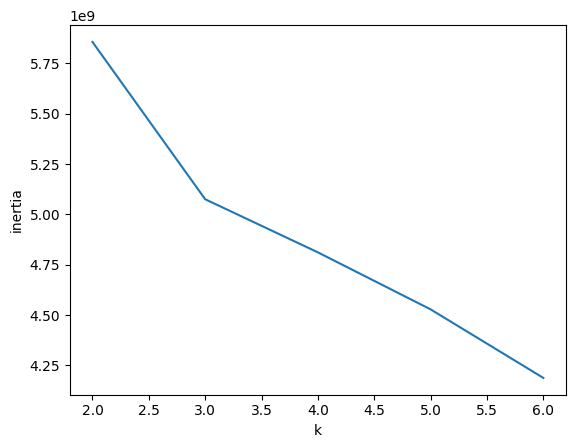

In [ ]:
inertia = []
for k in range(2, 7):
  km = KMeans(n_clusters=k, n_init='auto', random_state=42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)

plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()